In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data1=pd.read_csv('50_startups.csv')

In [3]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1=data1.rename({'R&D Spend':'RDS','Administration':'AMS','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,AMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data1.corr()

,RDS,AMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


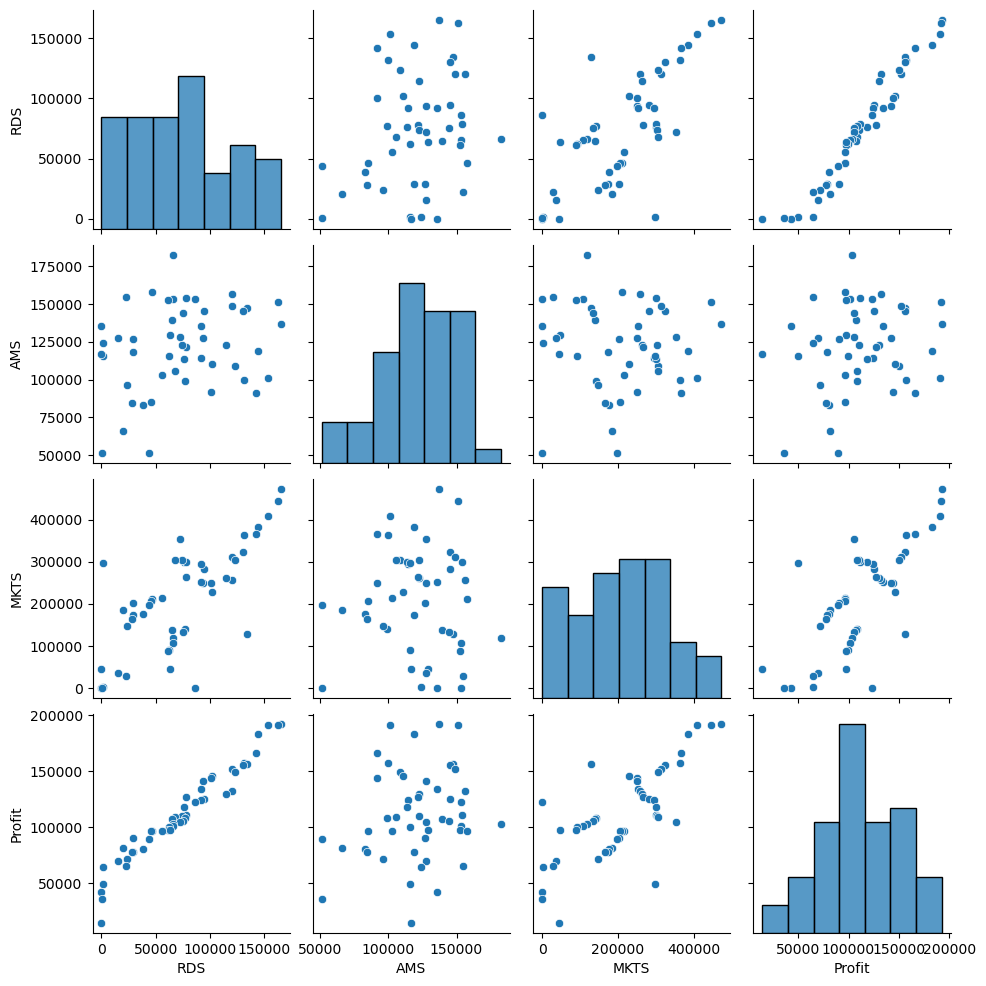

In [7]:
sns.pairplot(data1)

In [8]:
#MODEL BUILDIG

In [9]:
model1=smf.ols('Profit~RDS+AMS+MKTS',data=data1).fit()

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        18:54:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AMS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model1.rsquared

0.9507459940683246

In [12]:
# Builing SLR and MLR models for AMS and MKTS

In [13]:
model_A=smf.ols('Profit~AMS',data=data1).fit()

In [14]:
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.162
Time:                        18:54:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AMS            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_M=smf.ols('Profit~MKTS',data=data1).fit()

In [16]:
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.38e-10
Time:                        18:55:09   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model_A_M=smf.ols('Profit~AMS+MKTS',data=data1).fit()
model_A_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.50e-10
Time:                        18:55:19   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
AMS            0.3237      0.131      2.468      0.017       0.060       0.588
MKTS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#MODEL VALIDATION

In [19]:
# Colinearity problem check
# calculate VIF = 1/(1-Rsquared value) for all input variables

In [20]:
rsquared_R=smf.ols("RDS~AMS+MKTS",data=data1).fit().rsquared
vif_R=1/(1-rsquared_R)
vif_R

2.4689030699947017

In [21]:
rsquared_A=smf.ols("AMS~RDS+MKTS",data=data1).fit().rsquared
vif_A=1/(1-rsquared_A)
vif_A

1.1750910070550453

In [22]:
rsquared_M=smf.ols("MKTS~AMS+RDS",data=data1).fit().rsquared
vif_M=1/(1-rsquared_M)
vif_M

2.326773290530878

In [23]:
# No variable has VIF>20, So no colinearity problem in input variables

In [24]:
errors=model1.resid
errors.head()

0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
dtype: float64

In [25]:
# 2. Residual Analysis
# Test for normallity of residuals by Q-Q plot

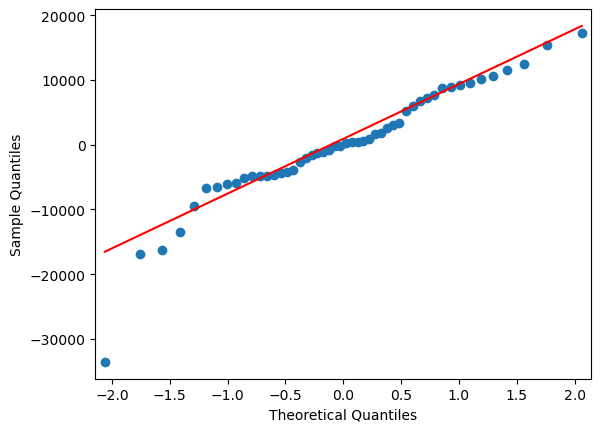

In [31]:
sm.qqplot(model1.resid,line='q')
plt.show()

In [28]:
outlier=list(np.where(model1.resid<-30000))
outlier

[array([49], dtype=int64)]

In [29]:
# Test for Homoscedasticity (plotting model's standardized fitted values vs standardized residual values)
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()          # user define fuction

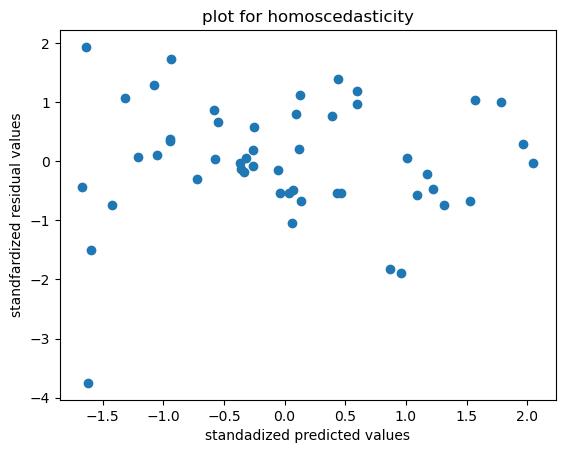

In [32]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title('plot for homoscedasticity')
plt.xlabel('standadized predicted values')
plt.ylabel('standfardized residual values')
plt.show()

In [33]:
# plots between residuals and input variables

eval_env: 1


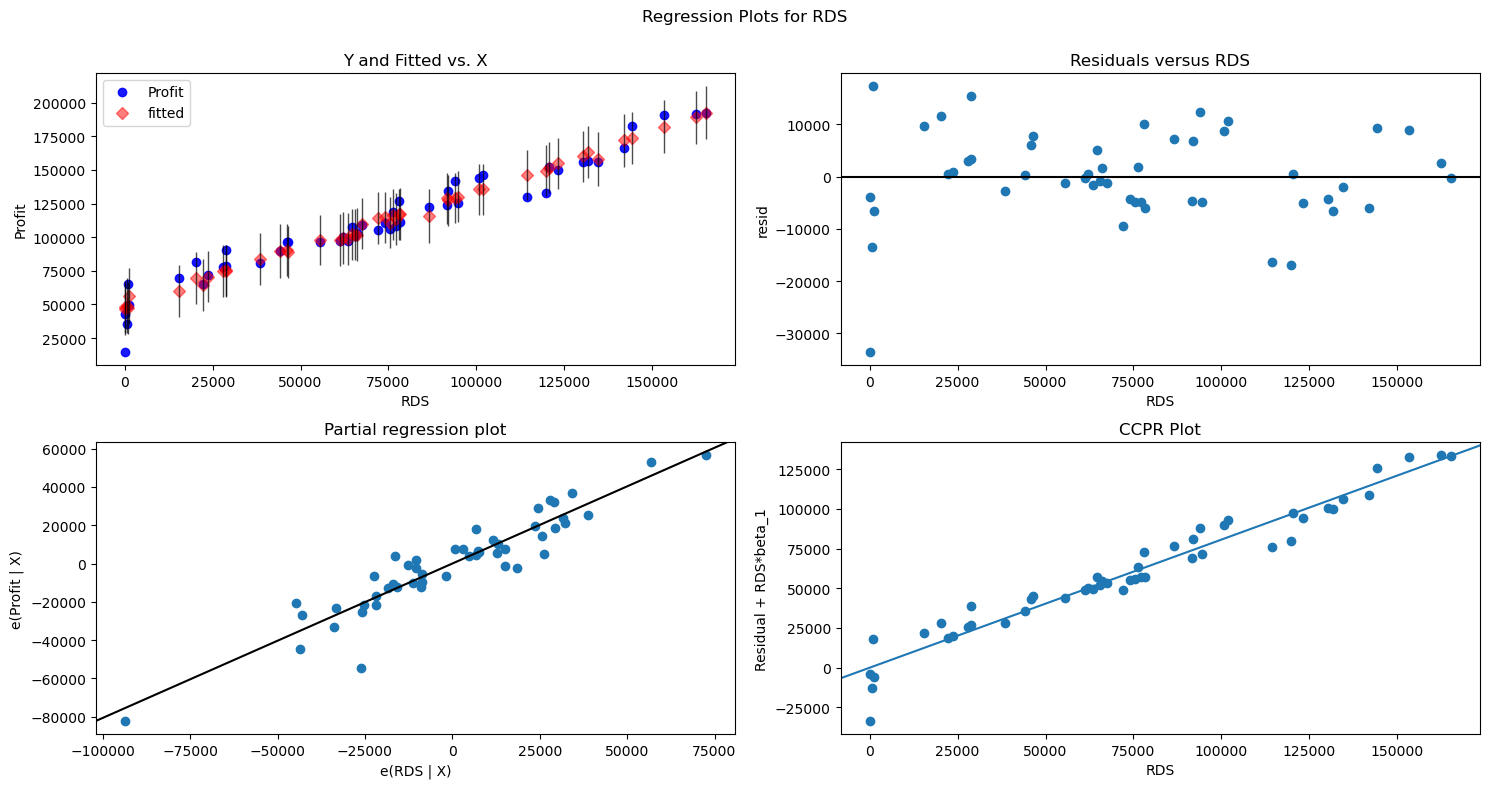

In [34]:
#plot between errors and RDS
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"RDS",fig=fig)
plt.show()  

eval_env: 1


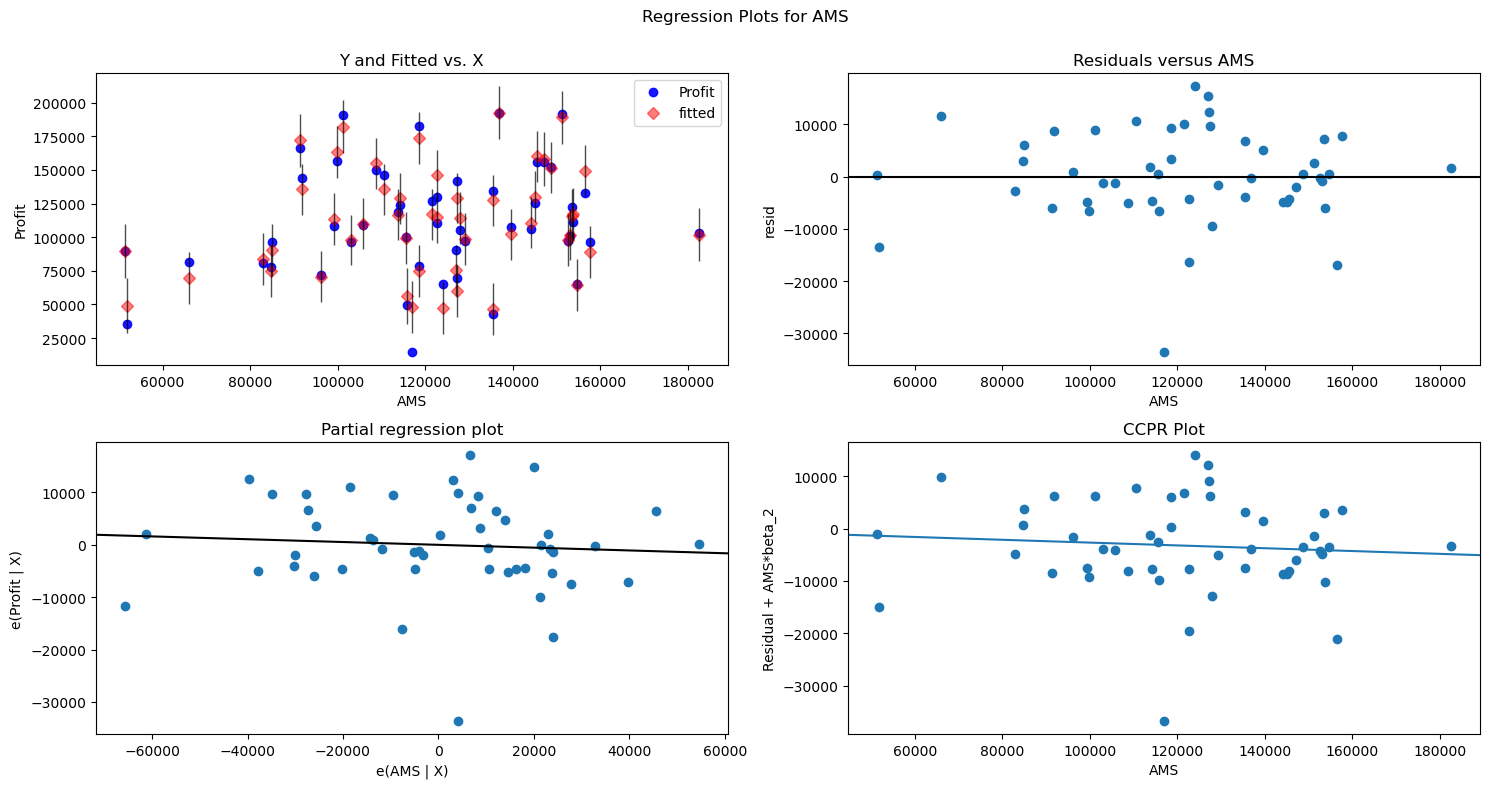

In [35]:
#plot between errors and AMS
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"AMS",fig=fig)
plt.show()                          

eval_env: 1


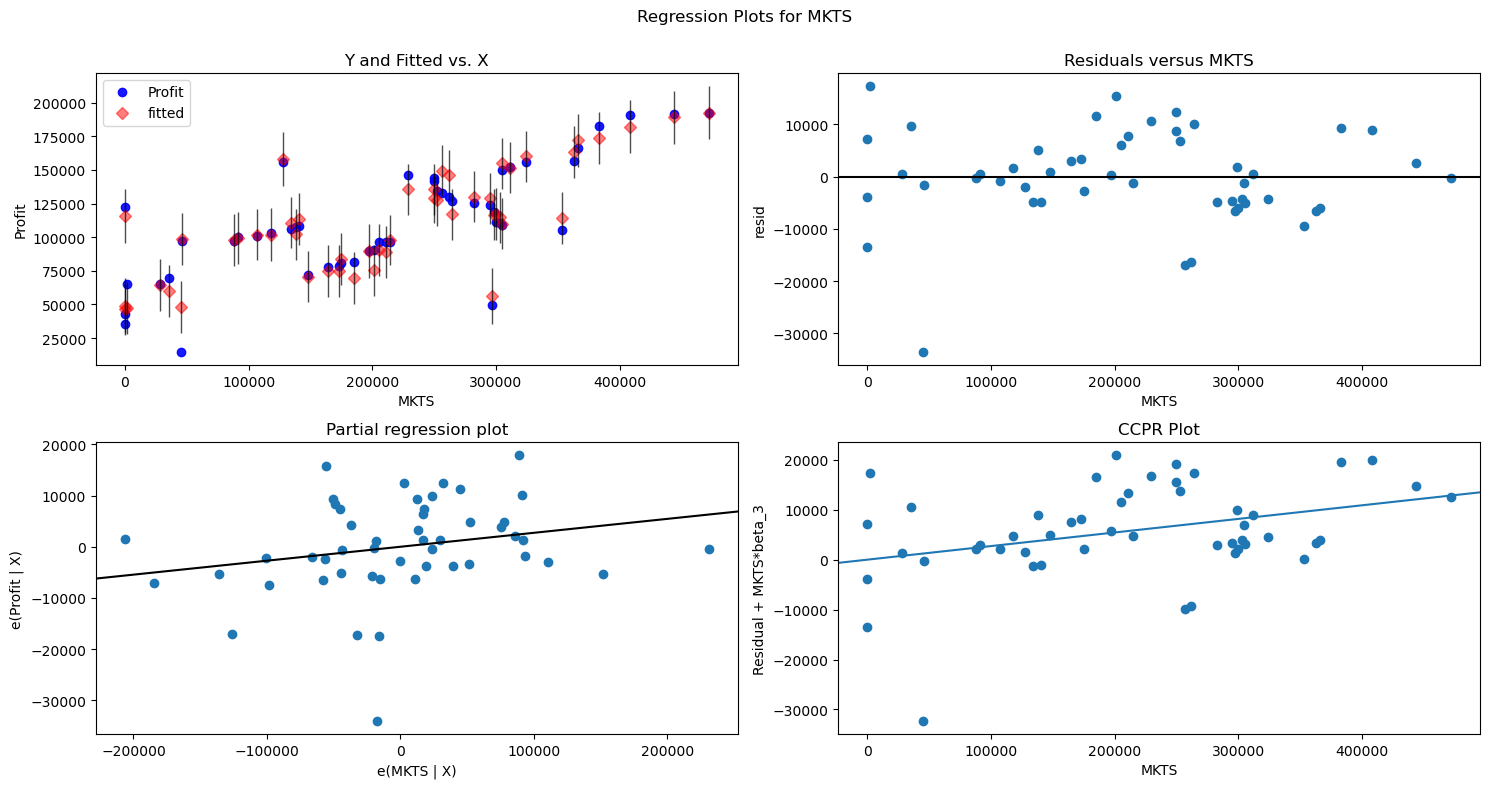

In [36]:
#plot between errors and MKTS
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,"MKTS",fig=fig)
plt.show()

In [37]:
#MODEL DELETATION TECHNIQIE FOR OUTLIERS AND INFLUENCERS

In [38]:
# Finding Outliers Using Cook's Distance
model_influencers=model1.get_influence()
(c,_)=model_influencers.cooks_distance


In [39]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

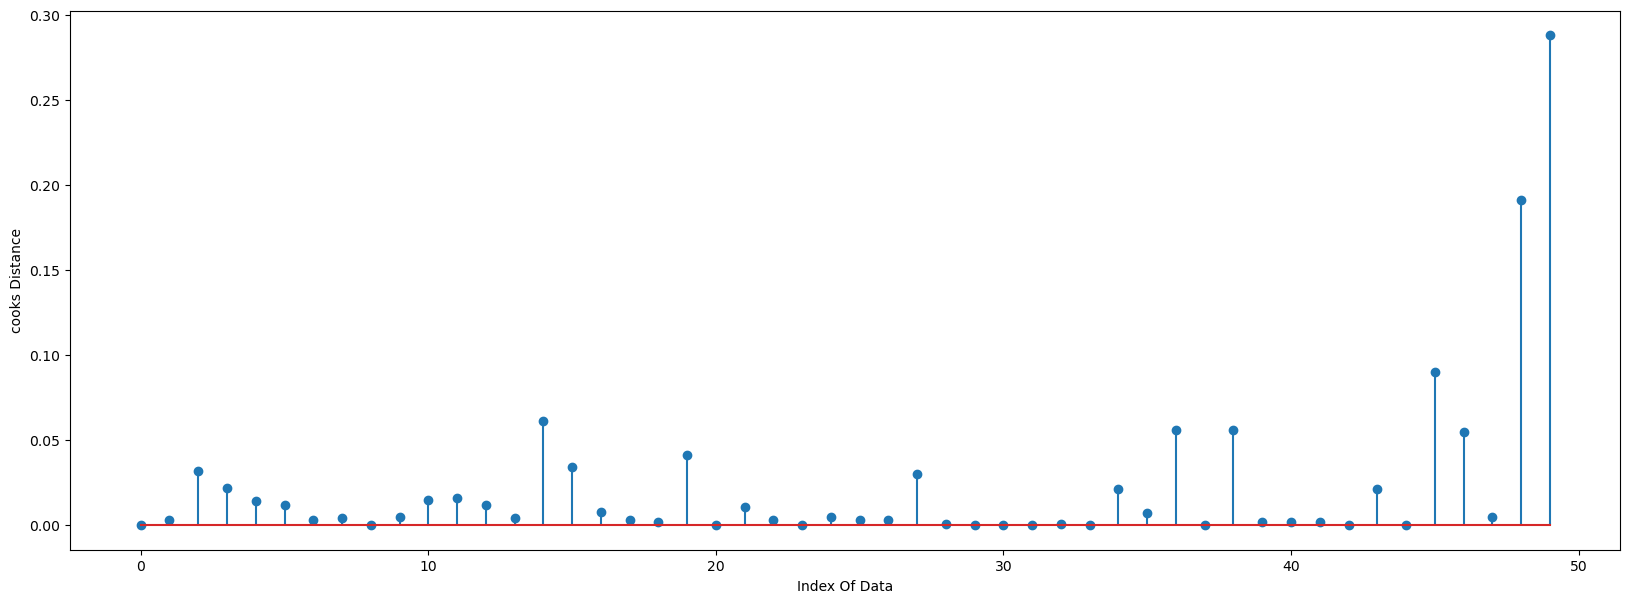

In [40]:
# plot cook's distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Index Of Data')
plt.ylabel('cooks Distance')
plt.show()

In [41]:
np.argmax(c),np.max(c)

(49, 0.28808229275432673)

In [42]:
# REMOVING OUTLIER OR INFLUENCIAL DATA POINT
data2=data1.drop(data1.index[49],axis=0).reset_index(drop=True)
data2

,RDS,AMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
final_model=smf.ols("Profit~RDS+AMS+MKTS",data=data2).fit()

In [44]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.85e-32
Time:                        18:59:49   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
AMS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
final_model.rsquared

0.9613162435129847

In [46]:
#MODEL PREDICTION

In [47]:
# Prediction On New Data
final_model.predict(data2)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [48]:
A1={'Model':['model1','final_model'],'Rsquared':[model1.rsquared,final_model.rsquared]}
Table=pd.DataFrame(A1)
Table

,Model,Rsquared
0,model1,0.950746
1,final_model,0.961316
